# 1. Data mining and data viz

## 1.1 Data analysis

For the project, we received two different datasets, which were further divided into train and test data for mitbih and into normal and abnormal beats for ptbdb.

1. mitbih_test.csv
2. mitbih_train.csv
3. ptbdb_abnormal.csv
4. ptbdb_normal.csv

We will start by loading each dataframe via our backend-method "load_dataframe".

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_load_data
import random
import numpy as np

mitbih_test = data_load_data.load_dataframe("test")
mitbih_train = data_load_data.load_dataframe("train")
ptbdb_abnormal = data_load_data.load_dataframe("abnormal")
ptbdb_normal = data_load_data.load_dataframe("normal")

We will focus on the mitib_train dataset first

In [41]:
mitbih_train.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can already see, that the column names aren't named like we used to see, but instead contain some numerical values

In [42]:
mitbih_train.dtypes

9.779411554336547852e-01       float64
9.264705777168273926e-01       float64
6.813725233078002930e-01       float64
2.450980395078659058e-01       float64
1.544117629528045654e-01       float64
                                ...   
0.000000000000000000e+00.84    float64
0.000000000000000000e+00.85    float64
0.000000000000000000e+00.86    float64
0.000000000000000000e+00.87    float64
0.000000000000000000e+00.88    float64
Length: 188, dtype: object

The datatypes for each column is of type float. If we look at the last five entries, we see an ascending order.
Further analysis concludes that the columns represent a timeline.

In [43]:
mitbih_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


The dataframe shows 188 columns of type float and 87553 rows of data. 

Since all values are numerical, and at first glance most of the data seems to be ranging from 0 to 1, we cannot immediately see any missing values.

In [44]:
print('Null values: ', mitbih_train.isna().sum().sum())

Null values:  0


To get a better undestanding of the data, we will try to visualize the data entries.

<Axes: xlabel='None', ylabel='None'>

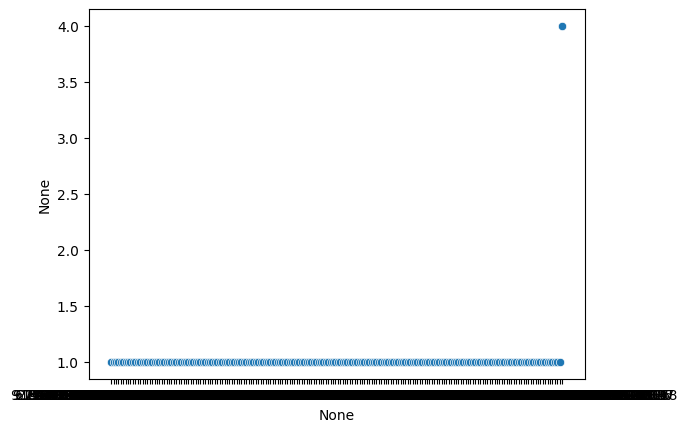

In [45]:
sns.scatterplot(x = mitbih_train.columns, y=mitbih_train.max())

We can see, that most columns seem to be normalized, but only the last column contains a maximum that is 4.
So lets look at the last column

In [46]:
last_col = mitbih_train.iloc[:,-1:]
last_col.value_counts()

0.000000000000000000e+00.88
0.0                            72470
4.0                             6431
2.0                             5788
1.0                             2223
3.0                              641
Name: count, dtype: int64

The last column resembles a qualitative variable.
Which by further analysis corresponds to the following medical terms:

'N' → 0 : Normal beat

'S' → 1 : Supraventricular ectopic beat

'V' → 2 : Ventricular ectopic beat

'F' → 3 : Fusion beat

'Q' → 4 : Unknown beat

So lets change the last column into something more readable and dislay the distribution in a countplot.

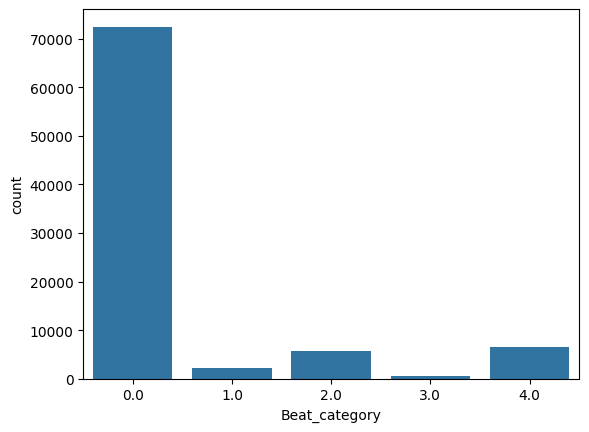

In [47]:
mitbih_train.columns = [*mitbih_train.columns[:-1], 'Beat_category']
sns.countplot(x = 'Beat_category', data = mitbih_train)

plt.show()

We can see, that the largest category is the normal heartbeat, followed by an unknown heartbeat.
The category "Ventricular ectopic beat" represents the largest group of known abonormal beats.

We will now combine the "abnormal" beats and look at the percentage they represent in the data:

In [ ]:
abormal_values = mitbih_train.Beat_category[mitbih_train.Beat_category > 0 and mitbih_train.Beat_category < 4]
print('The percentage of abnormal beats is {} percent'.format(len(abormal_values) / len(mitbih_train) * 100))

The percentage of abnormal beats is 17.227279476431416 percent


Comparing normal and abnormal data, we can look at the following pie-chart:

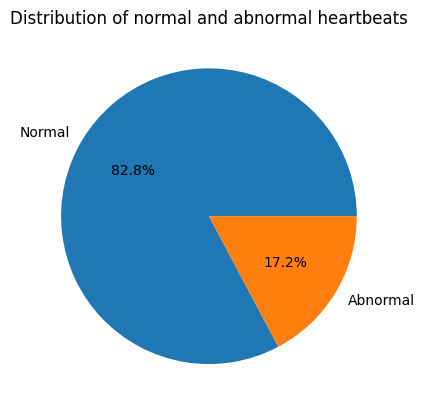

In [49]:
labels = 'Normal', 'Abnormal'
normal_values = mitbih_train.Beat_category[mitbih_train.Beat_category == 0]
plt.pie([len(normal_values), len(abormal_values)], labels=labels, autopct='%1.1f%%')
plt.title("Distribution of normal and abnormal heartbeats")
plt.show()

Analysing the different classes of heartbeats we can visualize the heartbeats

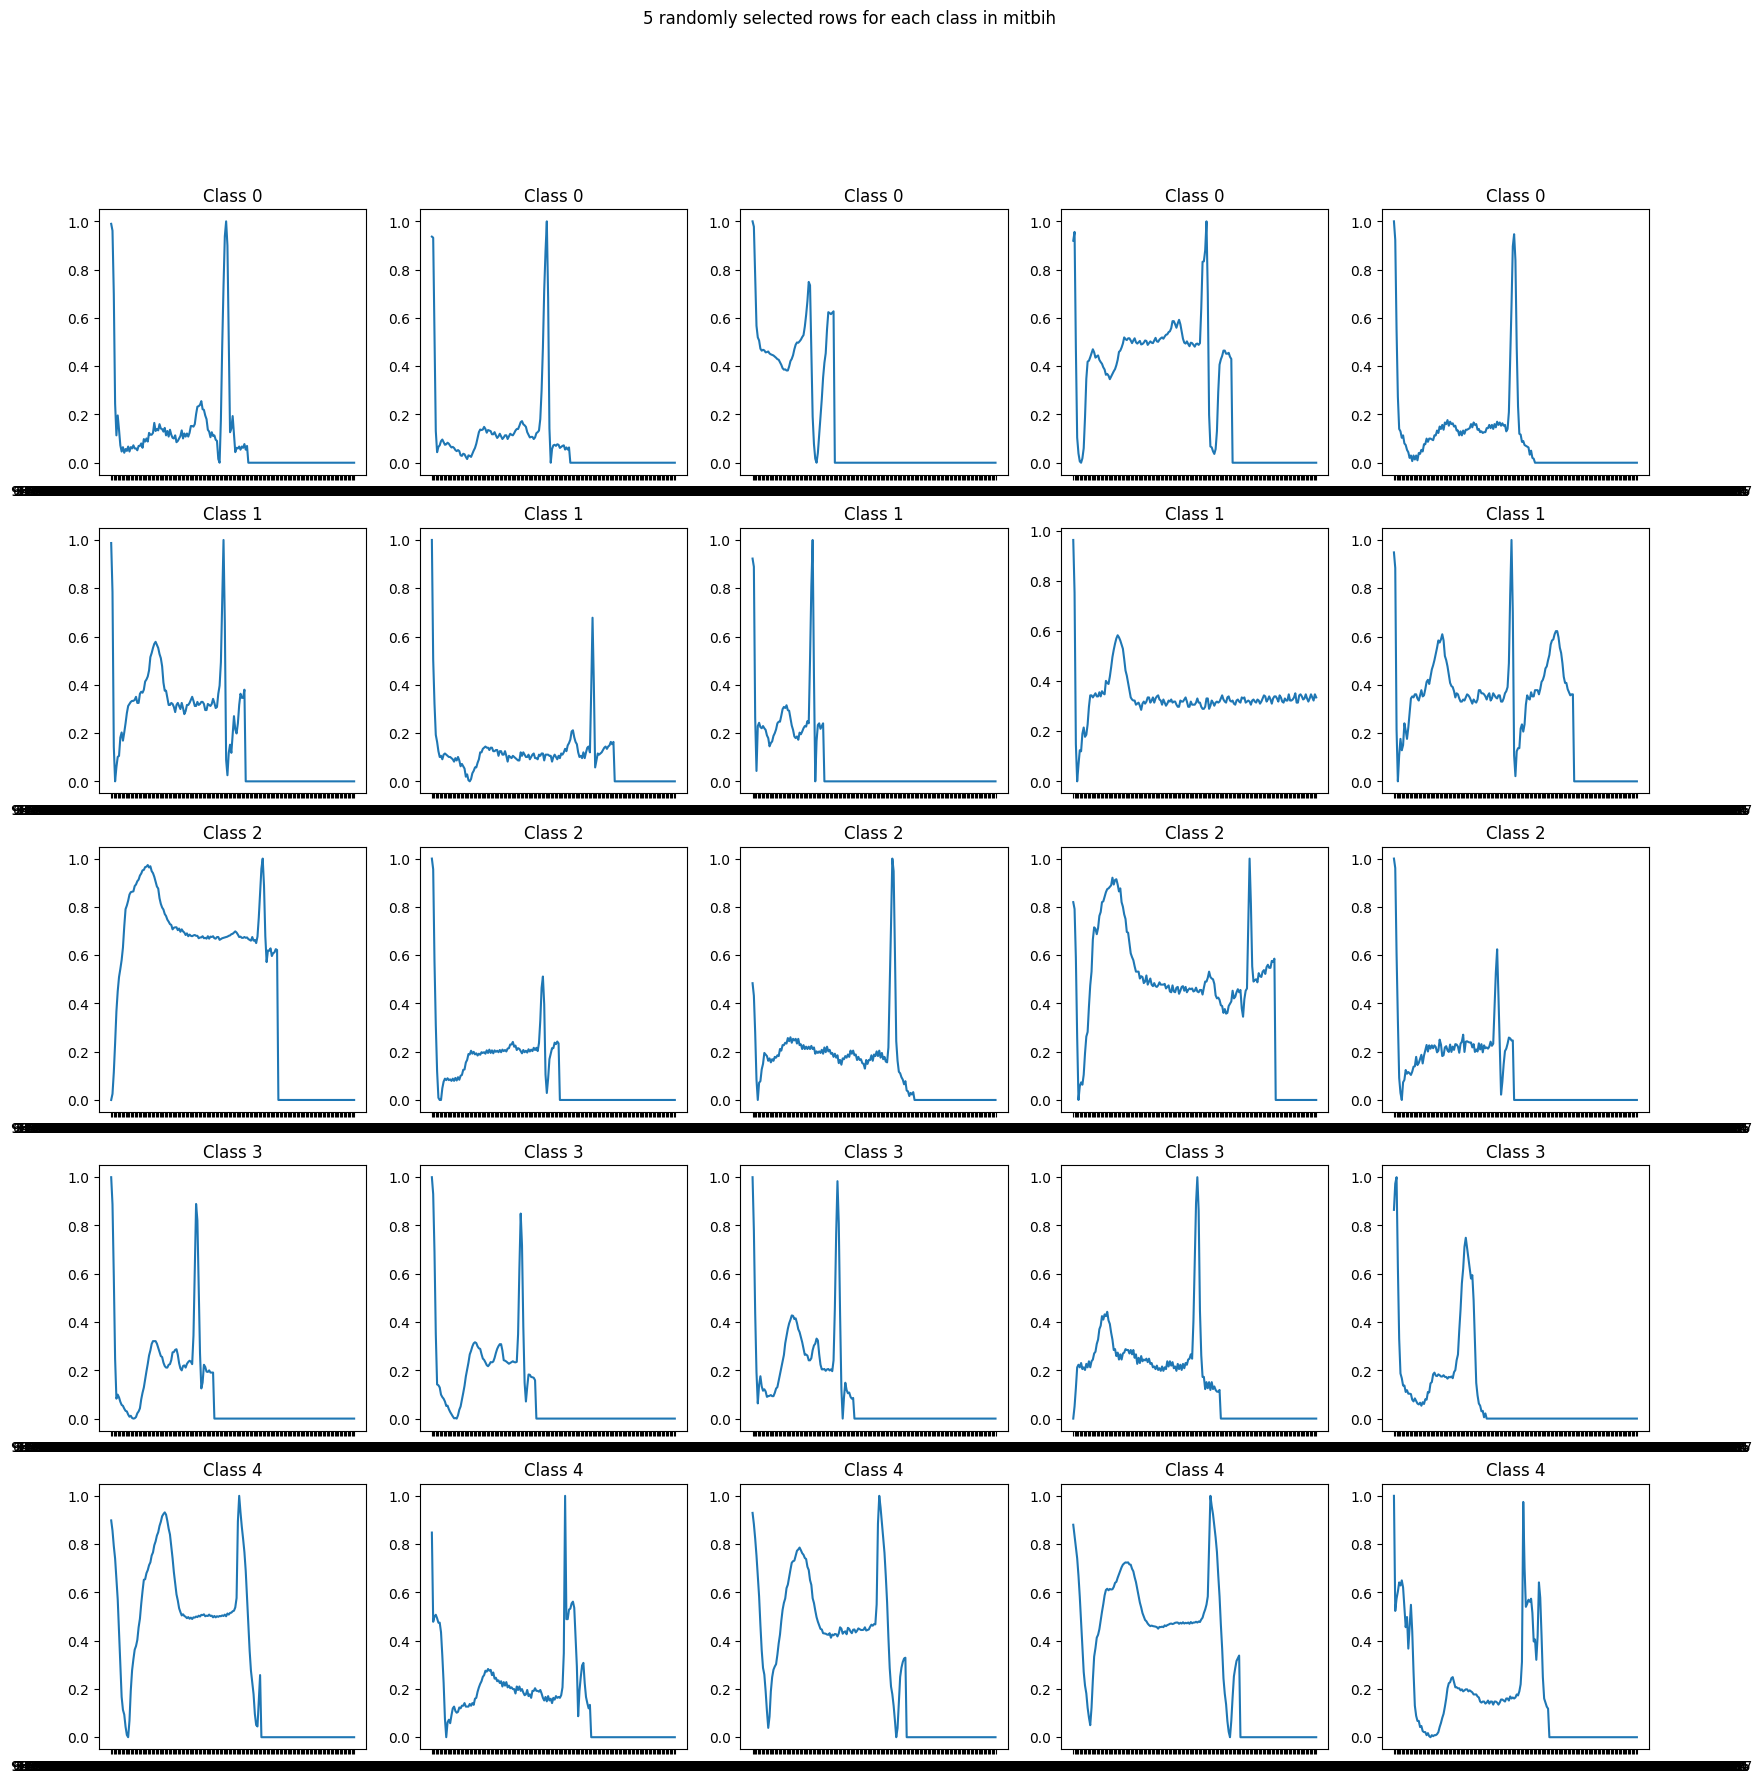

In [ ]:
mitbih_train_class0 = mitbih_train[mitbih_train['Beat_category']==0].drop('Beat_category', axis=1)
mitbih_train_class1 = mitbih_train[mitbih_train['Beat_category']==1].drop('Beat_category', axis=1)
mitbih_train_class2 = mitbih_train[mitbih_train['Beat_category']==2].drop('Beat_category', axis=1)
mitbih_train_class3 = mitbih_train[mitbih_train['Beat_category']==3].drop('Beat_category', axis=1)

#plot graphs

plt.figure(figsize=(20,20))
plt.suptitle('5 randomly selected rows for each class in mitbih')

graph_index = 1

for i, df in enumerate([mitbih_train_class0, mitbih_train_class1, mitbih_train_class2, mitbih_train_class3, mitbih_train_class4]):
    for _ in range(5):
        n = random.choice(df.index.values)
        plt.subplot(5 ,5, graph_index)
        plt.plot(df.columns, df.loc[n])
        plt.title(f'Class {i}')
        graph_index += 1

plt.show()

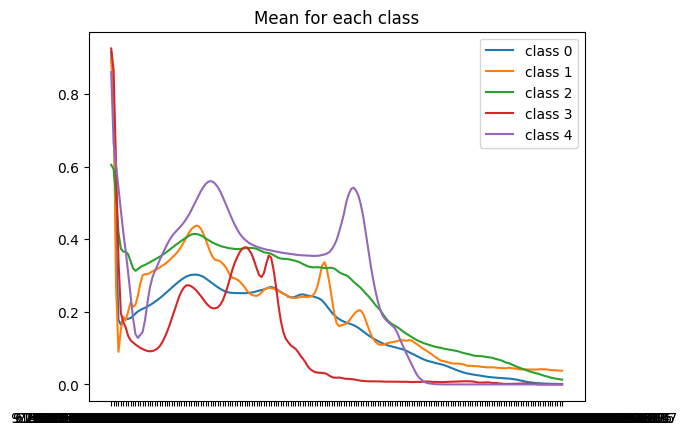

In [ ]:
plt.plot(mitbih_train_class0.mean(), label='class 0')
plt.plot(mitbih_train_class1.mean(), label='class 1')
plt.plot(mitbih_train_class2.mean(), label='class 2')
plt.plot(mitbih_train_class3.mean(), label='class 3')
plt.title('Mean for each class')
plt.legend()
plt.show()